# This is my first idea for going towards the hybrid architecture that I am looking to achieve. So, according to this idea, I am going to check if it works on the MNIST dataset or not.
-------------------------------------------------------------------------------------------------------------------
# Technology used: Tensorflow

I start with the usual utility cells for this task

In [1]:
# packages used for machine learning
import tensorflow as tf

# packages used for processing: 
import matplotlib.pyplot as plt # for visualization
import numpy as np

# for operating system related stuff
import os
import sys # for memory usage of objects
from subprocess import check_output

# import pandas for reading the csv files
import pandas as pd

# to plot the images inline
%matplotlib inline

In [2]:
# set the random seed to 3 so that the output is repeatable
np.random.seed(3)

In [3]:
# Input data files are available in the "../Data/" directory.

def exec_command(cmd):
    '''
        function to execute a shell command and see it's 
        output in the python console
        @params
        cmd = the command to be executed along with the arguments
              ex: ['ls', '../input']
    '''
    print(check_output(cmd).decode("utf8"))

In [4]:
# check the structure of the project directory
exec_command(['ls', '../..'])

Data
LICENSE
Literature_survey
Models
README.md
Scripts



In [6]:
''' Set the constants for the script '''

# various paths of the files
data_path = "../../Data" # the data path

dataset = "MNIST"

data_files = {
    'train': os.path.join(data_path, dataset, "train.csv"),
    'test' : os.path.join(data_path, dataset, "test.csv")
}

base_model_path = '../../Models'

current_model_path = os.path.join(base_model_path, "IDEA_1")

model_path_name = os.path.join(current_model_path, "Model2_v2")

# constant values:
highest_pixel_value = 255
train_percentage = 95
num_classes = 10
no_of_epochs = 500
batch_size = 64
hidden_neurons = 512

# Let's load in the data:
-------------------------------------------------------------------------------------------------------------------
## and perform some basic preprocessing on it

In [7]:
raw_data = pd.read_csv(data_files['train'])

In [8]:
n_features = len(raw_data.columns) - 1
n_examples = len(raw_data.label)
print n_features, n_examples

784 42000


In [9]:
raw_data.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
labels = np.array(raw_data['label'])

In [11]:
labels.shape

(42000,)

In [12]:
# extract the data from the remaining raw_data
features = np.ndarray((n_features, n_examples), dtype=np.float32)

count = 0 # initialize from zero
for pixel in raw_data.columns[1:]:
    feature_slice = np.array(raw_data[pixel])
    features[count, :] = feature_slice
    count += 1 # increment count

In [13]:
features.shape

(784, 42000)

In [14]:
# normalize the pixel data by dividing the values by the highest_pixel_value
features = features / highest_pixel_value

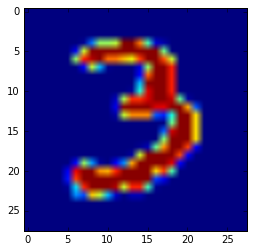

In [15]:
plt.imshow((features[:, 9]).reshape((28, 28)))

# use the function to generate the train_dev split
-------------------------------------------------------------------------------------------------------------------
link -> https://github.com/akanimax/machine-learning-helpers/blob/master/training/data_setup.py

In [16]:
# shuffle the data using a random permutation
perm = np.random.permutation(n_examples)
features = features[:, perm]
labels = labels[perm]

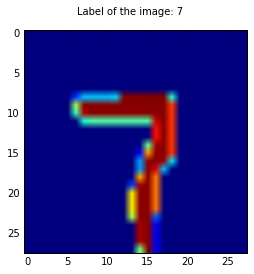

In [17]:
random_index = np.random.randint(n_examples)
random_image = features[:, random_index].reshape((28, 28))
# use plt to plot the image
plt.figure().suptitle("Label of the image: " + str(labels[random_index]))
plt.imshow(random_image)

In [18]:
# function to split the data into train - dev sets:
def split_train_dev(X, Y, train_percentage):
    '''
        function to split the given data into two small datasets (train - dev)
        @param
        X, Y => the data to be split
        (** Make sure the train dimension is the first one)
        train_percentage => the percentage which should be in the training set.
        (**this should be in 100% not decimal)
        @return => train_X, train_Y, test_X, test_Y
    '''
    m_examples = len(X)
    assert train_percentage < 100, "Train percentage cannot be greater than 100! NOOB!"
    partition_point = int((m_examples * (float(train_percentage) / 100)) + 0.5) # 0.5 is added for rounding

    # construct the train_X, train_Y, test_X, test_Y sets:
    train_X = X[: partition_point]; train_Y = Y[: partition_point]
    test_X  = X[partition_point: ]; test_Y  = Y[partition_point: ]

    assert len(train_X) + len(test_X) == m_examples, "Something wrong in X splitting"
    assert len(train_Y) + len(test_Y) == m_examples, "Something wrong in Y splitting"

    # return the constructed sets

    return train_X, train_Y, test_X, test_Y

In [19]:
train_X, train_Y, test_X, test_Y = split_train_dev(features.T, labels, train_percentage)

In [20]:
train_X.shape, train_Y.shape, test_X.shape, test_Y.shape

((39900, 784), (39900,), (2100, 784), (2100,))

In [21]:
train_X = train_X.T; test_X = test_X.T
train_X.shape, test_X.shape

((784, 39900), (784, 2100))

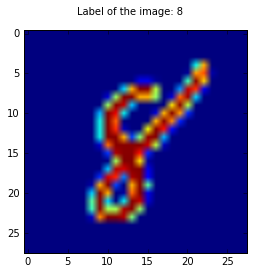

In [22]:
# check by plotting some image
random_index = np.random.randint(train_X.shape[-1])
random_image = train_X[:, random_index].reshape((28, 28))
# use plt to plot the image
plt.figure().suptitle("Label of the image: " + str(train_Y[random_index]))
plt.imshow(random_image)

# Point to reset from here onwards: 

In [37]:
# defining the Tensorflow graph for this task:
tf.reset_default_graph() # reset the graph here:

In [38]:
# define the placeholders:
tf_input_pixels = tf.placeholder(tf.float32, shape=(n_features, None))
tf_integer_labels = tf.placeholder(tf.int32, shape=(None,))

In [39]:
# image shaped pixels for the input_pixels:
tf_input_images = tf.reshape(tf.transpose(tf_input_pixels), shape=(-1, 28, 28, 1))
input_image_summary = tf.summary.image("input_image", tf_input_images)

In [40]:
# define the one hot encoded version fo the integer_labels
tf_one_hot_encoded_labels = tf.one_hot(tf_integer_labels, depth=num_classes, axis=0)
tf_one_hot_encoded_labels

<tf.Tensor 'one_hot:0' shape=(10, ?) dtype=float32>

In [41]:
# define the layer 0 biases:
lay_0_b = tf.get_variable("layer_0_biases", shape=(n_features, 1), initializer=tf.zeros_initializer())


# layer 1 weights 
lay_1_W = tf.get_variable("layer_1_weights", shape=(hidden_neurons, n_features), 
                              dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())
lay_1_b = tf.get_variable("layer_1_biases", shape=(hidden_neurons, 1), 
                            dtype=tf.float32, initializer=tf.zeros_initializer())

# layer 2 weights
lay_2_W = tf.get_variable("layer_2_weights", shape=(hidden_neurons, hidden_neurons), 
                              dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())
lay_2_b = tf.get_variable("layer_2_biases", shape=(hidden_neurons, 1), 
                            dtype=tf.float32, initializer=tf.zeros_initializer())

# layer 3 weights
lay_3_W = tf.get_variable("layer_3_weights", shape=(hidden_neurons, hidden_neurons), 
                              dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())
lay_3_b = tf.get_variable("layer_3_biases", shape=(hidden_neurons, 1), 
                            dtype=tf.float32, initializer=tf.zeros_initializer())

# layer 4 weights
lay_4_W = tf.get_variable("layer_4_weights", shape=(hidden_neurons, hidden_neurons), 
                              dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())
lay_4_b = tf.get_variable("layer_4_biases", shape=(hidden_neurons, 1), 
                            dtype=tf.float32, initializer=tf.zeros_initializer())

# layer 5 weights
lay_5_W = tf.get_variable("layer_5_weights", shape=(hidden_neurons, hidden_neurons), 
                              dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())
lay_5_b = tf.get_variable("layer_5_biases", shape=(hidden_neurons, 1), 
                            dtype=tf.float32, initializer=tf.zeros_initializer())

# layer 6 weights
lay_6_W = tf.get_variable("layer_6_weights", shape=(num_classes, hidden_neurons), 
                              dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())
lay_6_b = tf.get_variable("layer_6_biases", shape=(num_classes, 1), 
                            dtype=tf.float32, initializer=tf.zeros_initializer())

# define the forward computation:

In [42]:
# forward computation:
z1 = tf.matmul(lay_1_W, tf_input_pixels) + lay_1_b
a1 = tf.abs(z1)

z2 = tf.matmul(lay_2_W, a1) + lay_2_b
a2 = tf.abs(z2)

z3 = tf.matmul(lay_3_W, a2) + lay_3_b
a3 = tf.abs(z3) 

z4 = tf.matmul(lay_4_W, a3) + lay_4_b
a4 = tf.abs(z4) 

z5 = tf.matmul(lay_5_W, a4) + lay_5_b
a5 = tf.abs(z5) 

z6 = tf.matmul(lay_6_W, a5) + lay_6_b
a6 = tf.abs(z6)

# define the backward computation:

In [43]:
# in the backward computations, there are no actiavtion functions
y_in_back = a6

a1_back = tf.abs(tf.matmul(tf.transpose(lay_6_W), y_in_back) + lay_5_b)
a2_back = tf.abs(tf.matmul(tf.transpose(lay_5_W), a1_back) + lay_4_b)
a3_back = tf.abs(tf.matmul(tf.transpose(lay_4_W), a2_back) + lay_3_b)
a4_back = tf.abs(tf.matmul(tf.transpose(lay_3_W), a3_back) + lay_2_b)
a5_back = tf.abs(tf.matmul(tf.transpose(lay_2_W), a4_back) + lay_1_b)
a6_back = tf.abs(tf.matmul(tf.transpose(lay_1_W), a5_back) + lay_0_b)

In [44]:
y_in_back

<tf.Tensor 'Abs_5:0' shape=(10, ?) dtype=float32>

In [45]:
in_back_vector = tf.placeholder(tf.float32, shape=(num_classes, None))

In [46]:
# computations for obtaining predictions: 
pred1_back = tf.abs(tf.matmul(tf.transpose(lay_6_W), in_back_vector) + lay_5_b)
pred2_back = tf.abs(tf.matmul(tf.transpose(lay_5_W), pred1_back) + lay_4_b)
pred3_back = tf.abs(tf.matmul(tf.transpose(lay_4_W), pred2_back) + lay_3_b)
pred4_back = tf.abs(tf.matmul(tf.transpose(lay_3_W), pred3_back) + lay_2_b)
pred5_back = tf.abs(tf.matmul(tf.transpose(lay_2_W), pred4_back) + lay_1_b)
pred6_back = tf.abs(tf.matmul(tf.transpose(lay_1_W), pred5_back) + lay_0_b)

# generated digits:
generated_digits = pred6_back

In [47]:
x_out_back = a6_back
x_out_back, tf_input_pixels

(<tf.Tensor 'Abs_11:0' shape=(784, ?) dtype=float32>,
 <tf.Tensor 'Placeholder:0' shape=(784, ?) dtype=float32>)

In [48]:
x_out_back_image = tf.reshape(tf.transpose(x_out_back), shape=(-1, 28, 28, 1))
output_image_summary = tf.summary.image("output_image", x_out_back_image)

In [49]:
y_in_back

<tf.Tensor 'Abs_5:0' shape=(10, ?) dtype=float32>

# Now compute the forward cost

In [50]:
def normalize(x):
    '''
        function to range normalize the given input tensor
        @param 
        x => the input tensor to be range normalized
        @return => range normalized tensor
    '''
    x_max = tf.reduce_sum(x, axis=0)
    # return the range normalized prediction values:
    return (x / x_max)

In [51]:
# forward cost 
fwd_cost = tf.reduce_mean(tf.abs(normalize(y_in_back) - tf_one_hot_encoded_labels))
fwd_cost_summary = tf.summary.scalar("Forward_cost", fwd_cost)

# Now compute the backward cost

In [52]:
# backward cost 
# The backward cost is the mean squared error function
bwd_cost = tf.reduce_mean(tf.abs(x_out_back - tf_input_pixels))
bwd_cost_summary = tf.summary.scalar("Backward_cost", bwd_cost)

# The final cost is the addition of both forward and the backward costs 

In [53]:
cost = fwd_cost + bwd_cost
final_cost_summary = tf.summary.scalar("Final_cost", cost)

In [54]:
# define an optimizer for this task
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)
init = tf.global_variables_initializer()
all_summaries = tf.summary.merge_all()

In [55]:
n_train_examples = train_X.shape[-1]

In [56]:
sess = tf.InteractiveSession()

In [57]:
tensorboard_writer = tf.summary.FileWriter(model_path_name, graph=sess.graph, filename_suffix=".bot")

In [47]:
sess.run(init)

In [61]:
# start training the network for num_iterations and using the batch_size
global_step = 30202
for epoch in range(no_of_epochs):
    global_index = 0; costs = [] # start with empty list
    while(global_index < n_train_examples):
        start = global_index; end = start + batch_size
        train_X_minibatch = train_X[:, start: end]
        train_Y_minibatch = train_Y.astype(np.int32)[start: end]

        iteration = global_index / batch_size
        
        # run the computation:
        _, loss = sess.run((optimizer, cost), feed_dict={tf_input_pixels: train_X_minibatch, 
                                                         tf_integer_labels: train_Y_minibatch})

        # add the cost to the cost list
        costs.append(loss)

        if(iteration % 100 == 0):
            sums = sess.run(all_summaries, feed_dict={tf_input_pixels: train_X_minibatch, 
                                                         tf_integer_labels: train_Y_minibatch})
            
            print "Iteration: " + str(global_step) + " Cost: " + str(loss)

            tensorboard_writer.add_summary(sums, global_step = global_step)
        
        # increment the global index 
        global_index = global_index + batch_size
    
        global_step += 1
        
    # print the average epoch cost:
    print "Average epoch cost: " + str(sum(costs) / len(costs))
        

Iteration: 30202 Cost: 0.0901665
Iteration: 30302 Cost: 0.0986656
Iteration: 30402 Cost: 0.095157
Iteration: 30502 Cost: 0.0875812
Iteration: 30602 Cost: 0.0891486
Iteration: 30702 Cost: 0.0885183
Iteration: 30802 Cost: 0.0962265
Average epoch cost: 0.0927880158146
Iteration: 30826 Cost: 0.0935364
Iteration: 30926 Cost: 0.0983231
Iteration: 31026 Cost: 0.094923
Iteration: 31126 Cost: 0.086521
Iteration: 31226 Cost: 0.0893755
Iteration: 31326 Cost: 0.0904507
Iteration: 31426 Cost: 0.0896447
Average epoch cost: 0.0928122162676
Iteration: 31450 Cost: 0.0949218
Iteration: 31550 Cost: 0.0970471
Iteration: 31650 Cost: 0.0962551
Iteration: 31750 Cost: 0.085971
Iteration: 31850 Cost: 0.0891332
Iteration: 31950 Cost: 0.0910209
Iteration: 32050 Cost: 0.0887835
Average epoch cost: 0.0922074373214
Iteration: 32074 Cost: 0.0929793
Iteration: 32174 Cost: 0.0948284
Iteration: 32274 Cost: 0.0965945
Iteration: 32374 Cost: 0.0894294
Iteration: 32474 Cost: 0.0885334
Iteration: 32574 Cost: 0.0919329
Itera

KeyboardInterrupt: 

# Very Important: Save this trained model

In [62]:
model_file_name = os.path.join(model_path_name, model_path_name.split("/")[-1])
model_file_name

'../../Models/IDEA_1/Model2_v2/Model2_v2'

In [63]:
saver = tf.train.Saver()

In [64]:
saver.save(sess, model_file_name, global_step=global_step)

'../../Models/IDEA_1/Model2_v2/Model2_v2-113677'

# Model13 seems to be the most promising till now. It has (Mean absolute difference) function as the forward and the backward costs
-------------------------------------------------------------------------------------------------------------------
# Model2_v2 (currently being used), is same as Model13 but with the softmax function replaced by the range normalizer function for getting a probability distribution

# The following cell shows how the network final activations look like upon passing some of the test images that It has never seen before
-------------------------------------------------------------------------------------------------------------------
# Run the following cell multiple times to see the effect better

In [60]:
saver.restore(sess, tf.train.latest_checkpoint(model_path_name))

INFO:tensorflow:Restoring parameters from ../../Models/IDEA_1/Model2_v2/Model2_v2-30202


Predicted label: 4


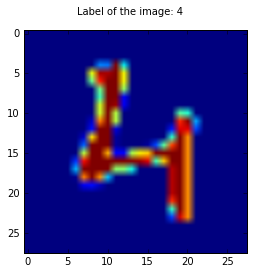

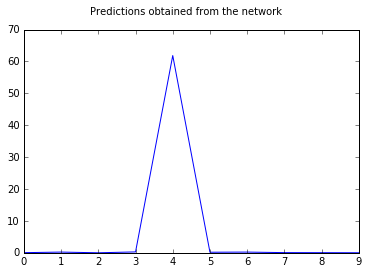

In [98]:
# check by plotting some image
random_index = np.random.randint(test_X.shape[-1])
random_image = test_X[:, random_index].reshape((28, 28))
# use plt to plot the image
plt.figure().suptitle("Label of the image: " + str(test_Y[random_index]))
plt.imshow(random_image)

# generate the predictions for one random image from the test set.
predictions = np.squeeze(sess.run(y_in_back, feed_dict={tf_input_pixels: test_X[:, random_index].reshape((-1, 1))}))

plt.figure().suptitle("Predictions obtained from the network")
plt.plot(range(10), predictions);
#print predictions
print "Predicted label: " + str(np.argmax(predictions))

# Calculate the accuracy of the network on the training and the test dataset

In [99]:
tf_input_pixels, train_X.shape

(<tf.Tensor 'Placeholder:0' shape=(784, ?) dtype=float32>, (784, 39900))

In [100]:
preds = sess.run(y_in_back, feed_dict={tf_input_pixels: train_X})

In [101]:
correct = np.sum(np.argmax(preds, axis=0) == train_Y)
accuracy = (float(correct) / train_X.shape[-1]) * 100
print "Training accuracy: " + str(accuracy)

Training accuracy: 99.8596491228


# Calculate the test accuracy:

In [102]:
test_preds = sess.run(y_in_back, feed_dict={tf_input_pixels: test_X})
test_correct = np.sum(np.argmax(test_preds, axis=0) == test_Y)
test_accuracy = (float(test_correct) / test_X.shape[-1]) * 100
print "Testing accuracy:" + str(test_accuracy)

Testing accuracy:97.4285714286


# Now comes the best part! Can The network generate digits?
-------------------------------------------------------------------------------------------------------------------
# Let's generate some digits by tweaking the learned representation

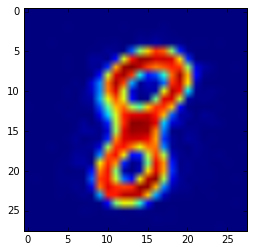

In [105]:
generator_array = np.array([0, 0, 0, 0, 0, 0, 0, 0, 30, 0]).reshape(-1, 1).astype(np.float32)
generator_array.dtype
generated_image = sess.run(generated_digits, feed_dict={in_back_vector: generator_array}).reshape((28, 28))
plt.imshow(generated_image)

# generate representations for different digits by walking along their respective axes

In [106]:
total_frames = 100

In [107]:
all_digits = [] # start with an empty list
for walking_axis in range(num_classes):
    reps = np.zeros(shape=(num_classes, total_frames))
    for cnt in range(total_frames):
        reps[walking_axis, cnt] = cnt
    all_digits.append(reps)

all_digits = np.hstack(all_digits)

In [108]:
all_digits.shape

(10, 1000)

In [109]:
# obtain the images for these inputs:
images = sess.run(generated_digits, feed_dict={in_back_vector: all_digits}).T.reshape((-1, 28, 28))

In [110]:
images.shape

(1000, 28, 28)

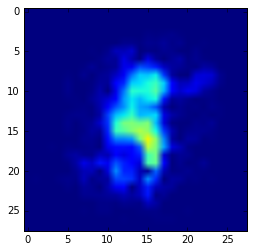

In [111]:
imagelist = images

import matplotlib.animation as animation
from IPython.display import HTML

fig = plt.figure() # make figure

# make axesimage object
# the vmin and vmax here are very important to get the color map correct
im = plt.imshow(imagelist[0], cmap=plt.get_cmap('jet'), vmin=0, vmax=1);

# function to update figure
def updatefig(j):
    # set the data in the axesimage object
    im.set_array(imagelist[j])
    # return the artists set
    return [im]
# kick off the animation
ani = animation.FuncAnimation(fig, updatefig, frames=range(images.shape[0]), 
                              interval=50, blit=True)

In [112]:
HTML(ani.to_html5_video())

# Hell Yeah! That's a victory! We can indeed generate digits using this neural network